In [8]:
import sympy
import numpy
from matplotlib import pyplot
%matplotlib inline
sympy.init_printing()

In [9]:
w = sympy.Symbol('w',real = True)

f = w**2 + 3*w - 5
f

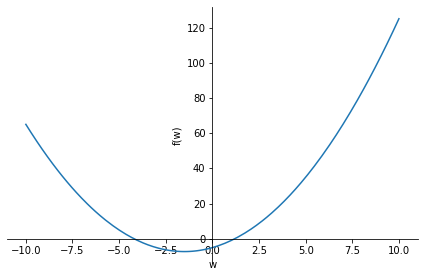

In [10]:
sympy.plotting.plot(f)

In [11]:
fprime = f.diff(w)
fprime

In [12]:
sympy.solve(fprime,w)

In [13]:
fpnum = sympy.lambdify(w,fprime)
type(fpnum)

function

In [14]:
w= 10.0

for i in range(1000):
    w=w-fpnum(w)*0.01
print(w)

-1.4999999806458753


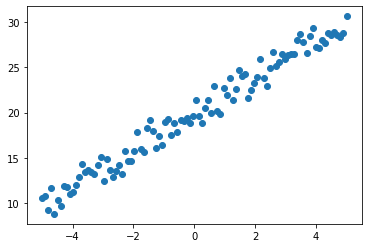

In [15]:
x_data = numpy.linspace(-5,5,100)
w_true = 2
b_true = 20

y_data = w_true * x_data + b_true + numpy.random.normal(size=len(x_data))

pyplot.scatter(x_data,y_data)

In [16]:
x_data.shape

In [17]:
y_data.shape

In [19]:
w,b,x,y = sympy.symbols("w b x y")

cost_function = (w*x + b - y) ** 2
cost_function